In [187]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import ssl

In [188]:
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Домашнее задание.**
Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.
Переменная, которую надо предсказать - ’MEDV’.

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

Для начала обучим модель на "сырых" данных и посмотрим на ошибку

In [194]:
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [201]:
x = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data.MEDV
х_norm = scaler.fit_transform(x)
x_minmax = min_max_scaler.fit_transform(x)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(х_norm, y, test_size=0.2)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(x_minmax, y, test_size=0.2)

In [203]:
reg = LinearRegression()
relation = reg.fit(X_train, y_train)
prediction = reg.predict(X_test)
print('Error: {}'.format(mean_absolute_error(y_test, prediction)))

Error: 3.3244065525049713


In [204]:
reg = LinearRegression()
relation = reg.fit(X_train_m, y_train_m)
prediction = reg.predict(X_test_m)
print('Error: {}'.format(mean_absolute_error(y_test_m, prediction)))

Error: 3.389941587414481


Посмотрим на распределение переменной, которую нам необходимо предсказать

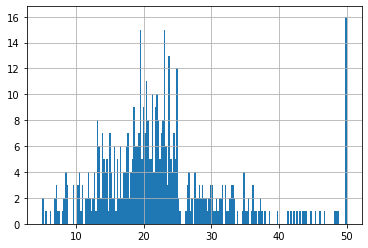

In [205]:
data.MEDV.hist(bins=200)

In [206]:
# видно, что на 50 очень большая частота. Посмотрим на данные, где MEDV=50

In [207]:
data[data.MEDV == 50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44,50.0


In [208]:
len(data[data.MEDV == 50])

16

In [209]:
# 16 из 506 (3% данных). Данные очень разные. Мы уберем 50.

In [210]:
data = data[data.MEDV != 50]

In [211]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,490.0,3.643241,8.722154,0.00632,0.082045,0.24751,3.647422,88.9762
ZN,490.0,11.112245,22.844626,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,490.0,11.113143,6.821302,0.74000,5.190000,9.69000,18.100000,27.7400
CHAS,490.0,0.059184,0.236209,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,490.0,0.554307,0.116688,0.38500,0.449000,0.53800,0.624000,0.8710
RM,490.0,6.245471,0.653147,3.56100,5.881000,6.18500,6.578000,8.7800
AGE,490.0,68.278980,28.164790,2.90000,44.550000,76.80000,93.875000,100.0000
DIS,490.0,3.834519,2.109948,1.13700,2.111050,3.27590,5.214600,12.1265
RAD,490.0,9.514286,8.691297,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,490.0,408.002041,168.065190,187.00000,280.250000,330.00000,666.000000,711.0000


In [212]:
# проверим на адекватность переменную TAX
data['TR'] = (data['TAX'] / 100) 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,490.0,3.643241,8.722154,0.00632,0.082045,0.24751,3.647422,88.9762
ZN,490.0,11.112245,22.844626,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,490.0,11.113143,6.821302,0.74000,5.190000,9.69000,18.100000,27.7400
CHAS,490.0,0.059184,0.236209,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,490.0,0.554307,0.116688,0.38500,0.449000,0.53800,0.624000,0.8710
RM,490.0,6.245471,0.653147,3.56100,5.881000,6.18500,6.578000,8.7800
AGE,490.0,68.278980,28.164790,2.90000,44.550000,76.80000,93.875000,100.0000
DIS,490.0,3.834519,2.109948,1.13700,2.111050,3.27590,5.214600,12.1265
RAD,490.0,9.514286,8.691297,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,490.0,408.002041,168.065190,187.00000,280.250000,330.00000,666.000000,711.0000


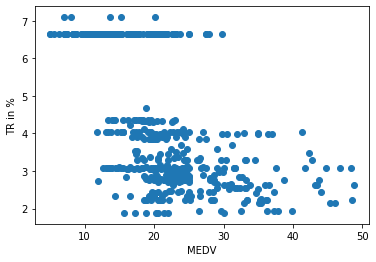

In [213]:
# показатель адекватный, но пока не особо понятно, какая связь с MEDV. Может, не будем использовать.  
plt.scatter(data['MEDV'], data['TR'])
plt.xlabel('MEDV')
plt.ylabel('TR in %')
plt.show()

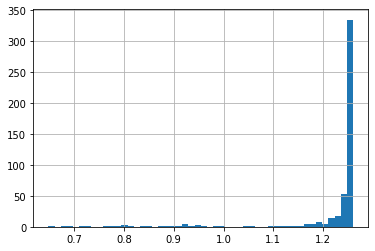

In [214]:
# выведем показатель Bk, так как переменную B в таком виде я не понимаю. B = 1000(Bk — 0.63)²
data['Bk'] = (data['B'] / 1000) ** 0.5 + 0.63
data.Bk.hist(bins=50)

In [215]:
# показатель нелогичный. Не будем его использовать
len(data[data.Bk > 1])

454

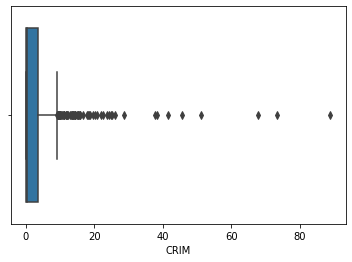

In [216]:
# посмотрим не распределение переменной CRIM
sns.boxplot(data.CRIM)

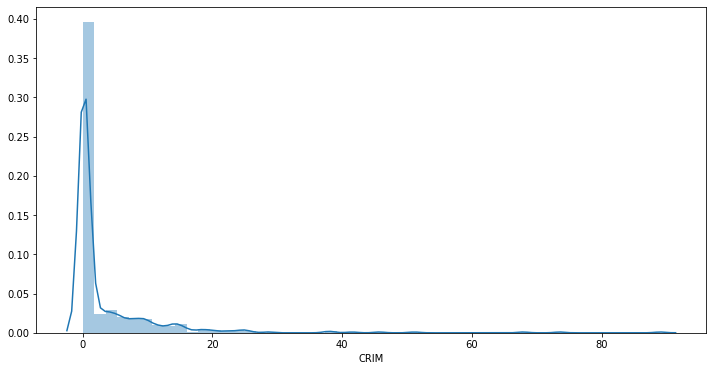

In [217]:
plt.figure(figsize=[12, 6])
sns.distplot(data.CRIM)

In [218]:
# уберем выбросы
data[data.CRIM > 20].sort_values(by='CRIM', ascending = False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TR,Bk
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.90,17.21,10.4,6.66,1.260000
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62,8.8,6.66,0.758258
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98,5.0,6.66,1.250460
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666.0,20.2,2.60,10.11,15.0,6.66,0.680990
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98,7.0,6.66,0.927103
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666.0,20.2,329.46,27.38,8.5,6.66,1.203986
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666.0,20.2,396.90,30.59,5.0,6.66,1.260000
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666.0,20.2,18.82,14.52,10.9,6.66,0.767186
413,28.6558,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666.0,20.2,210.97,20.08,16.3,6.66,1.089315
417,25.9406,0.0,18.1,0,0.679,5.304,89.1,1.6475,24,666.0,20.2,127.36,26.64,10.4,6.66,0.986875


In [219]:
data_clean = data[data.CRIM < 20]

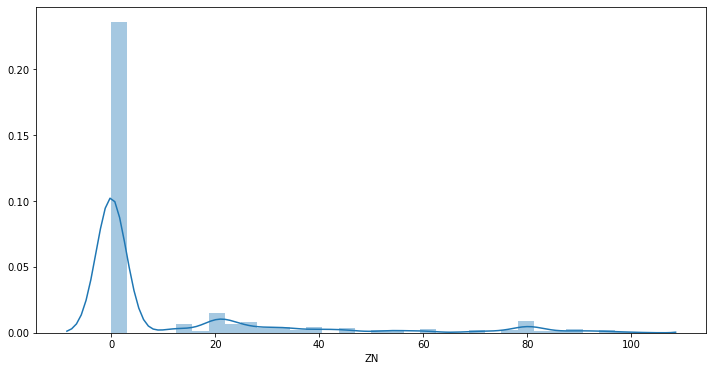

In [220]:
plt.figure(figsize=[12, 6])
sns.distplot(data.ZN)

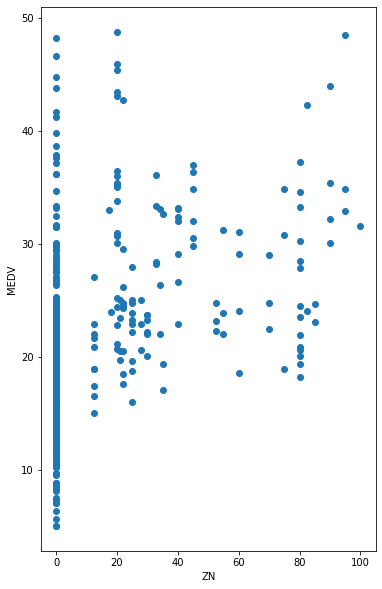

In [221]:
plt.figure(figsize=[6,10])
plt.scatter(data.ZN, data.MEDV)
plt.xlabel('ZN')
plt.ylabel('MEDV')
plt.show()

In [222]:
data[data.ZN > 100]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TR,Bk


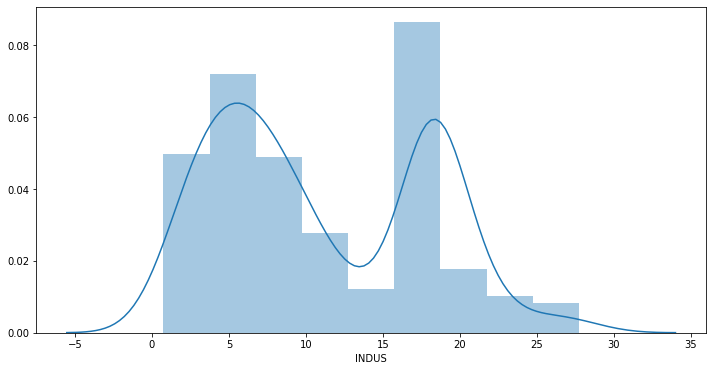

In [223]:
plt.figure(figsize=[12, 6])
sns.distplot(data.INDUS)

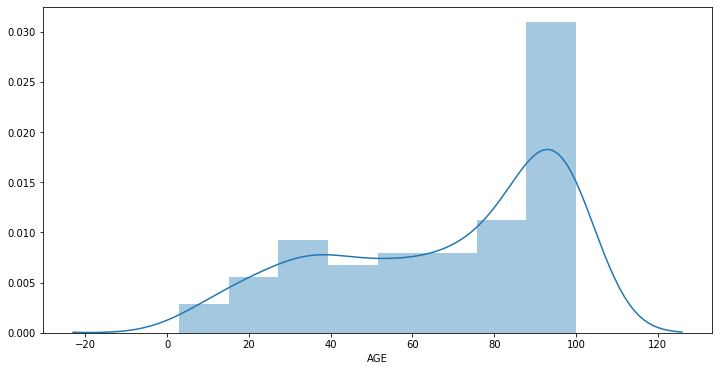

In [224]:
plt.figure(figsize=[12, 6])
sns.distplot(data.AGE)

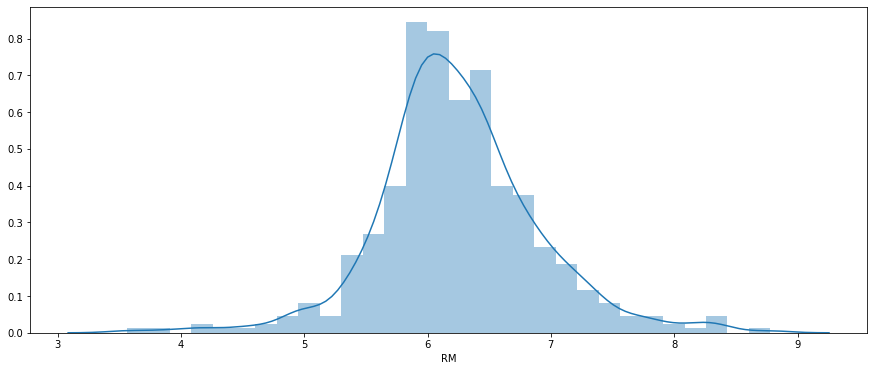

In [225]:
plt.figure(figsize=[15, 6])
sns.distplot(data.RM)

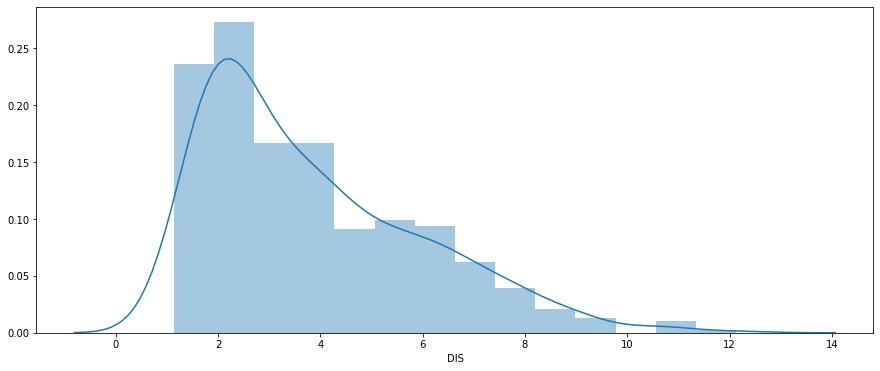

In [226]:
plt.figure(figsize=[15, 6])
sns.distplot(data.DIS)

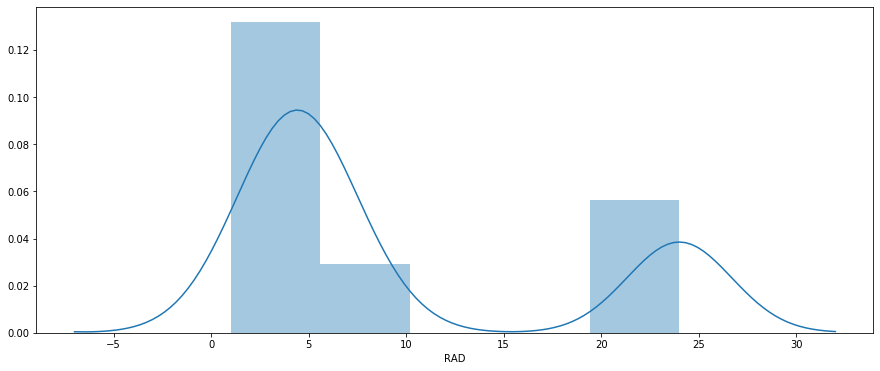

In [227]:
plt.figure(figsize=[15, 6])
sns.distplot(data.RAD)

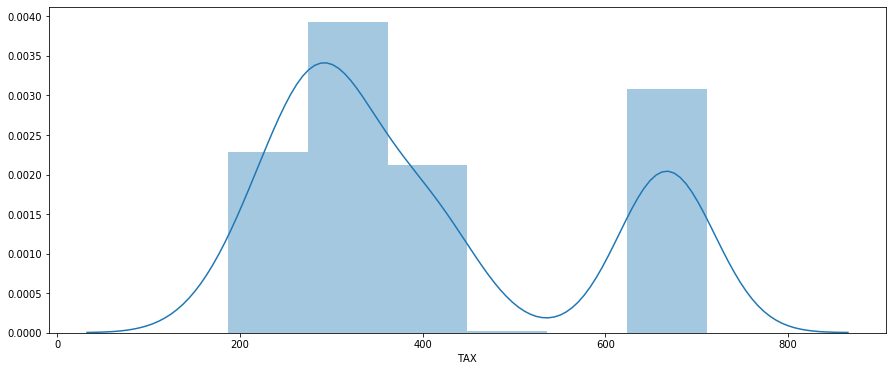

In [228]:
plt.figure(figsize=[15, 6])
sns.distplot(data.TAX)

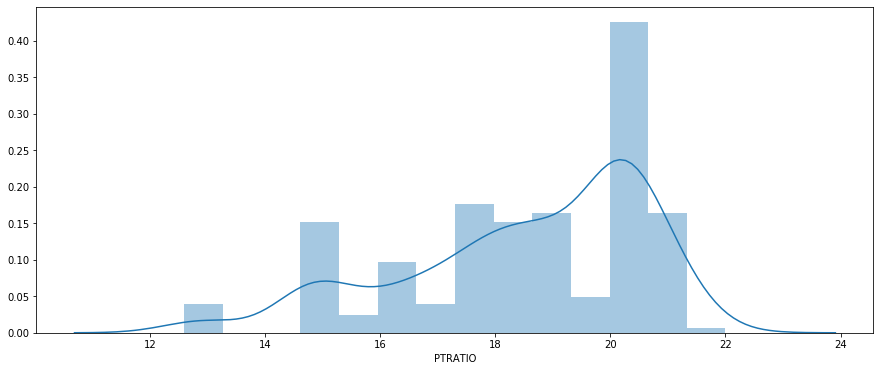

In [229]:
plt.figure(figsize=[15, 6])
sns.distplot(data.PTRATIO)

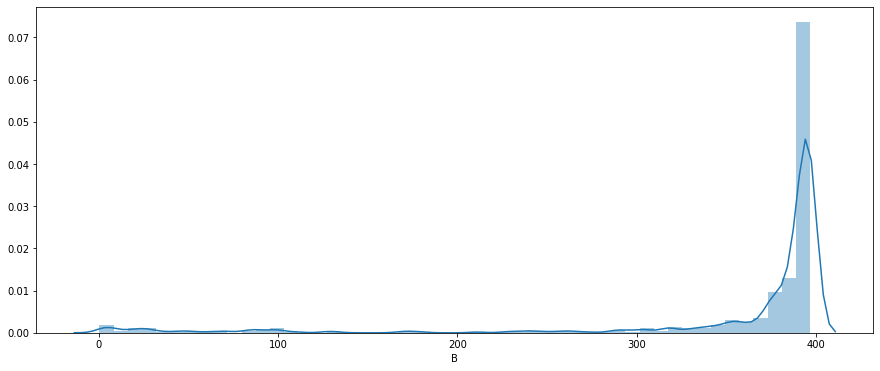

In [230]:
plt.figure(figsize=[15, 6])
sns.distplot(data.B)

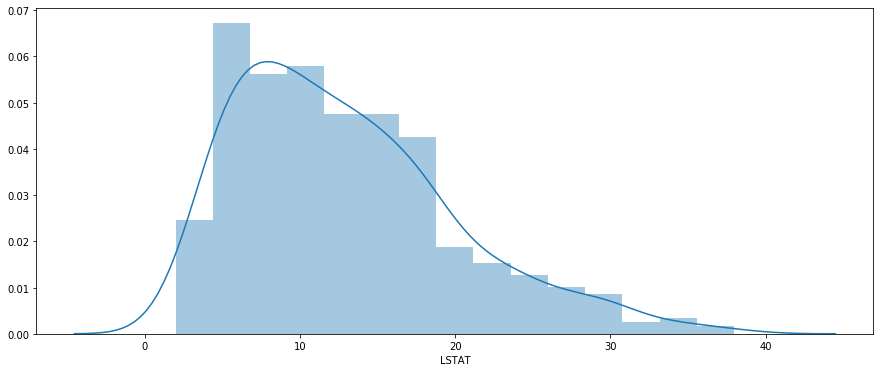

In [231]:
plt.figure(figsize=[15, 6])
sns.distplot(data.LSTAT)

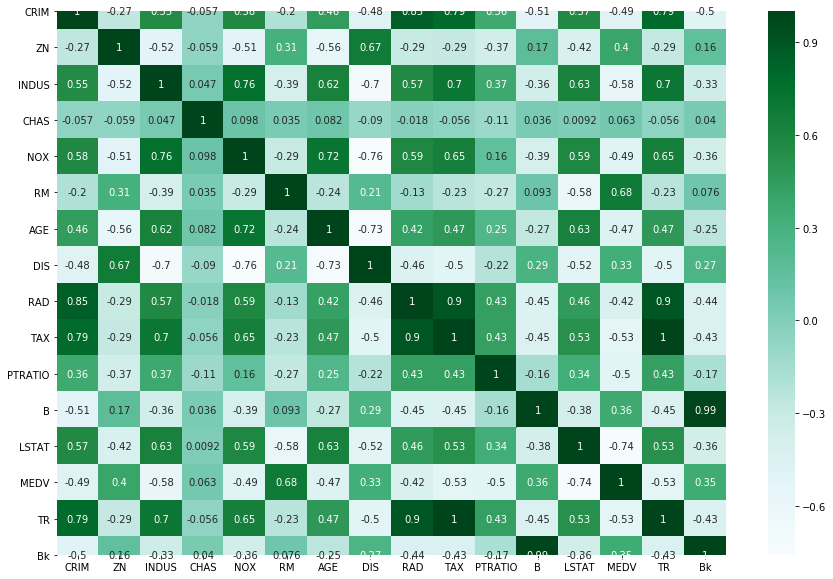

In [232]:
plt.figure(figsize=[15,10])
sns.heatmap(data_clean.corr(), annot=True, cmap='BuGn')

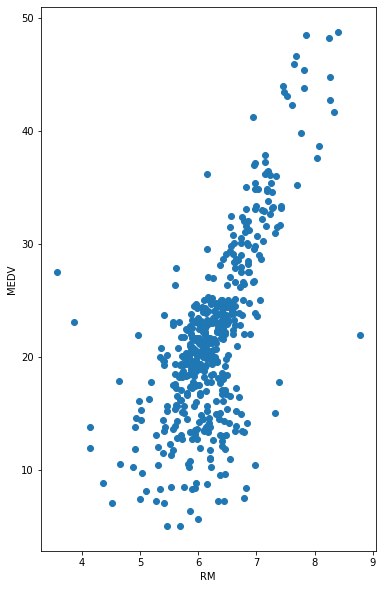

In [233]:
plt.figure(figsize=[6,10])
plt.scatter(data.RM, data.MEDV)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [234]:
# посмотрим теперь на ошибку в очищенных данных, не убирая никаких параметров
i = 0
error = 0
while i < 5:
    x = data_clean[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
    y = data_clean.MEDV
    х_norm = scaler.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(х_norm, y, test_size=0.2)
    reg = LinearRegression()
    relation = reg.fit(X_train, y_train)
    prediction = reg.predict(X_test)
    error += mean_absolute_error(y_test, prediction)
    i += 1
print('Error:', error / 5)

Error: 2.851365379504119


In [167]:
# ошибку уменьшилась. Теперь уберем атрибуты, которые, на мой взгляд, не являются логичными или релевантными для данной модели
i = 0
error = 0
while i < 5:
    x = data_clean[['CRIM', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']]
    y = data_clean.MEDV
    х_norm = scaler.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(х_norm, y, test_size=0.2)
    reg = LinearRegression()
    relation = reg.fit(X_train, y_train)
    prediction = reg.predict(X_test)
    error += mean_absolute_error(y_test, prediction)
    i += 1
print('Error:', error / 5)

Error: 2.8273631988047105


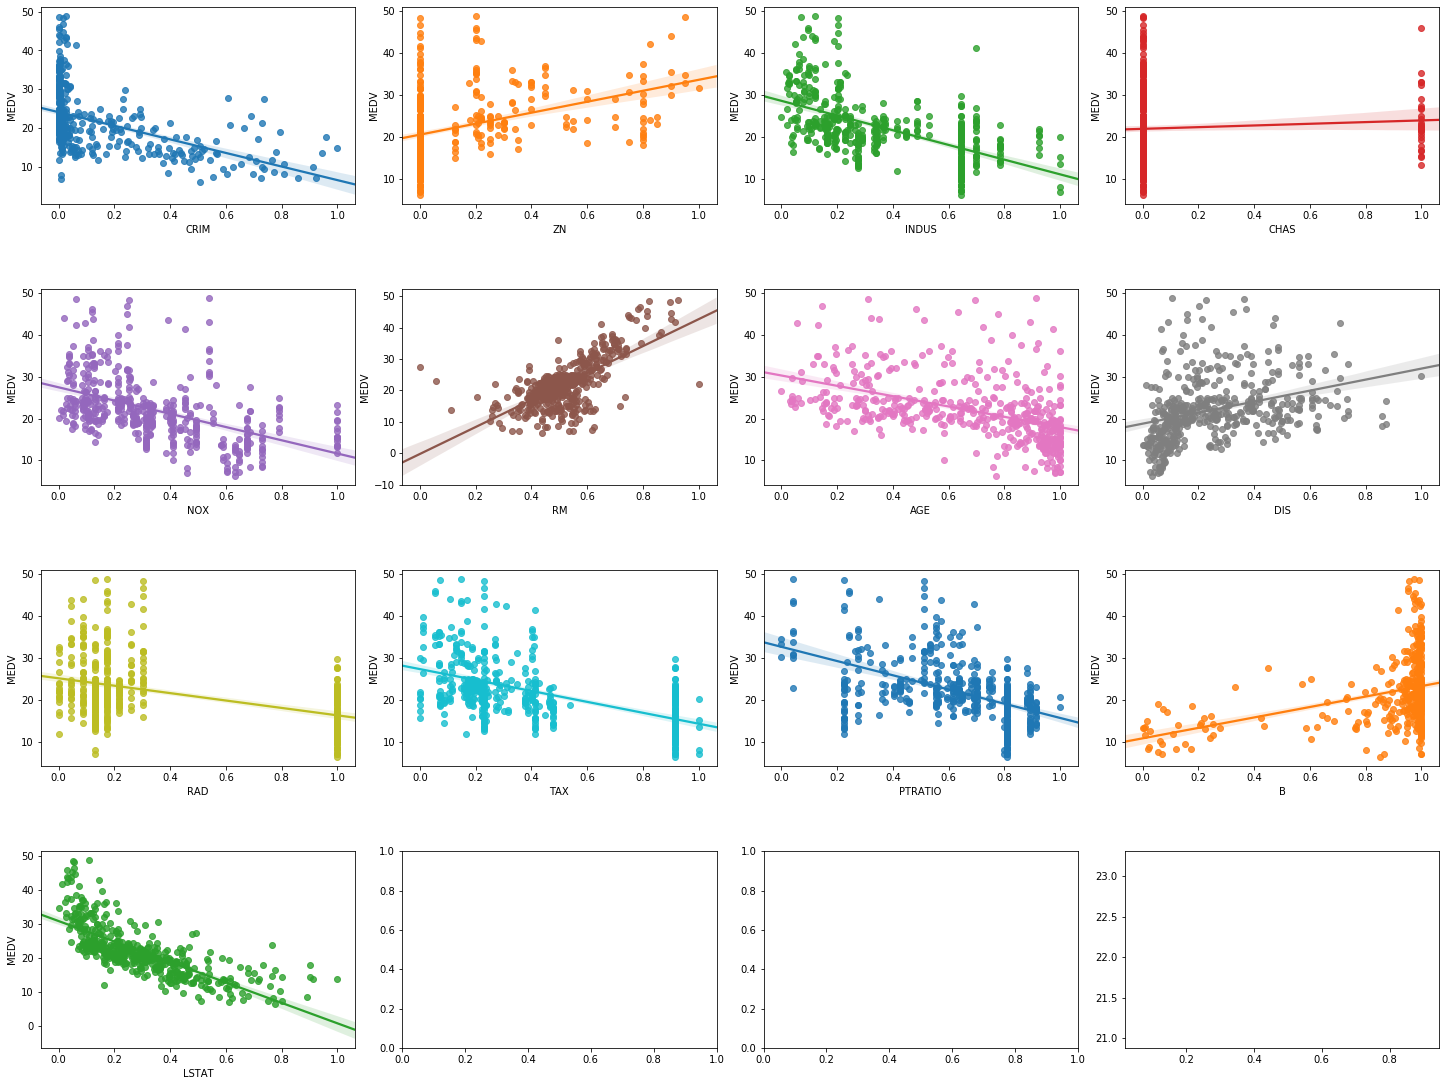

In [235]:
# ошибка вновь увеличилась
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x = data_clean.loc[:,column_sels]
y = data_clean['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 15))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [253]:
i = 0
error = 0
while i < 5:
    x = data_clean[['CRIM', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']]
    y = data_clean.MEDV
    х_norm = scaler.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(х_norm, y, test_size=0.2)
    reg = LinearRegression()
    relation = reg.fit(X_train, y_train)
    prediction = reg.predict(X_test)
    error += mean_absolute_error(y_test, prediction)
    i += 1
print('Error: {}'.format(error/5))

Error: 2.9643494871979437


Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [254]:
i = 0
error = 0
while i < 5:
    x = data_clean[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
    y = data_clean.MEDV
    х_minmax = min_max_scaler.fit_transform(x)
    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(х_minmax, y, test_size=0.2)
    reg = LinearRegression()
    relation = reg.fit(X_train_m, y_train_m)
    prediction = reg.predict(X_test_m)
    error += mean_absolute_error(y_test_m, prediction)
    i += 1
print('Error: {}'.format(error/5))

Error: 2.8818361804337393


In [ ]:
# ОСТАВИМ ПОСЛЕДНЮЮ МОДЕЛЬ, ТАК КАК МЕНЬШЕ ВСЕГО ОШИБКА